In [2]:
# 資料加工、處理、分析函式庫
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習函式庫
import sklearn

# 顯示到小數點後第3位
%precision 3

'%.3f'

#### 9-3-1 嘗試主成分分析

相關係數:0.889:


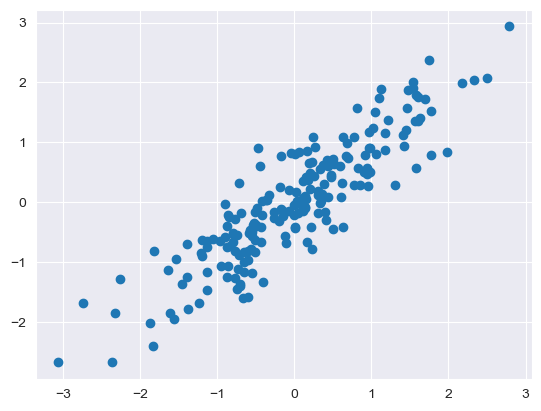

In [23]:
from sklearn.preprocessing import StandardScaler

# 製作RandomState
sample = np.random.RandomState(1)

# 生成2個亂數
X = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 計算相關係數與圖形化
print('相關係數:{:.3f}:'.format(sp.stats.pearsonr(X_std[:, 0], X_std[:, 1])[0]))
plt.scatter(X_std[:, 0], X_std[:, 1])

In [36]:
# 匯入
from sklearn.decomposition import PCA

# 主成分分析
pca = PCA(n_components = 2)
pca.fit(X_std)

PCA(n_components=2)

In [25]:
# 看components_屬性-特徵向量
print(pca.components_)

# 第一主成分[-.707, -.707], 第二主成分[-.707, .707]

[[-0.707 -0.707]
 [-0.707  0.707]]


In [26]:
# explained_variance_屬性-主成分的變異數
print('各個主成分的變異數:{}'.format(pca.explained_variance_))

各個主成分的變異數:[1.899 0.111]


In [27]:
# .explained_variance_ratio_屬性-主成分變異數比例
print('各個主成分的變異數比例:{}'.format(pca.explained_variance_ratio_))
# 可讀取為在第一主成分裡保持了原本資料裡94.5%的資料

各個主成分的變異數比例:[0.945 0.055]


(-3.3534087054527717,
 3.079070151762556,
 -2.9610077757452697,
 3.2159825436132246)

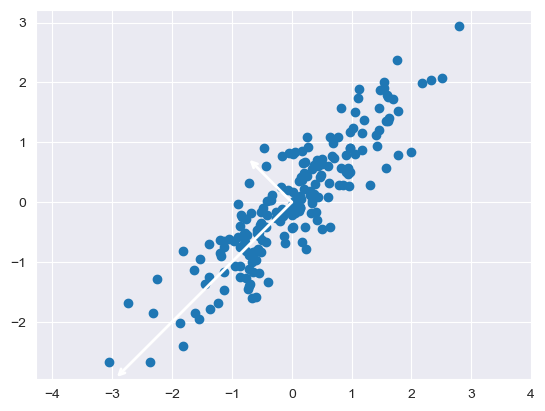

In [9]:
# 設定參數
arrowprops = dict(arrowstyle = '->',
                  linewidth = 2,
                  shrinkA = 0, shrinkB = 0)

# 用來描繪箭頭的函式
def draw_vector(v0, v1):
    plt.gca().annotate('',v1, v0, arrowprops = arrowprops)

# 描繪原本的資料
plt.scatter(X_std[:, 0], X_std[:, 1])

# 以箭頭顯示主成分分析的兩軸
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

#### 9-3-2 主成分分析的實際範例

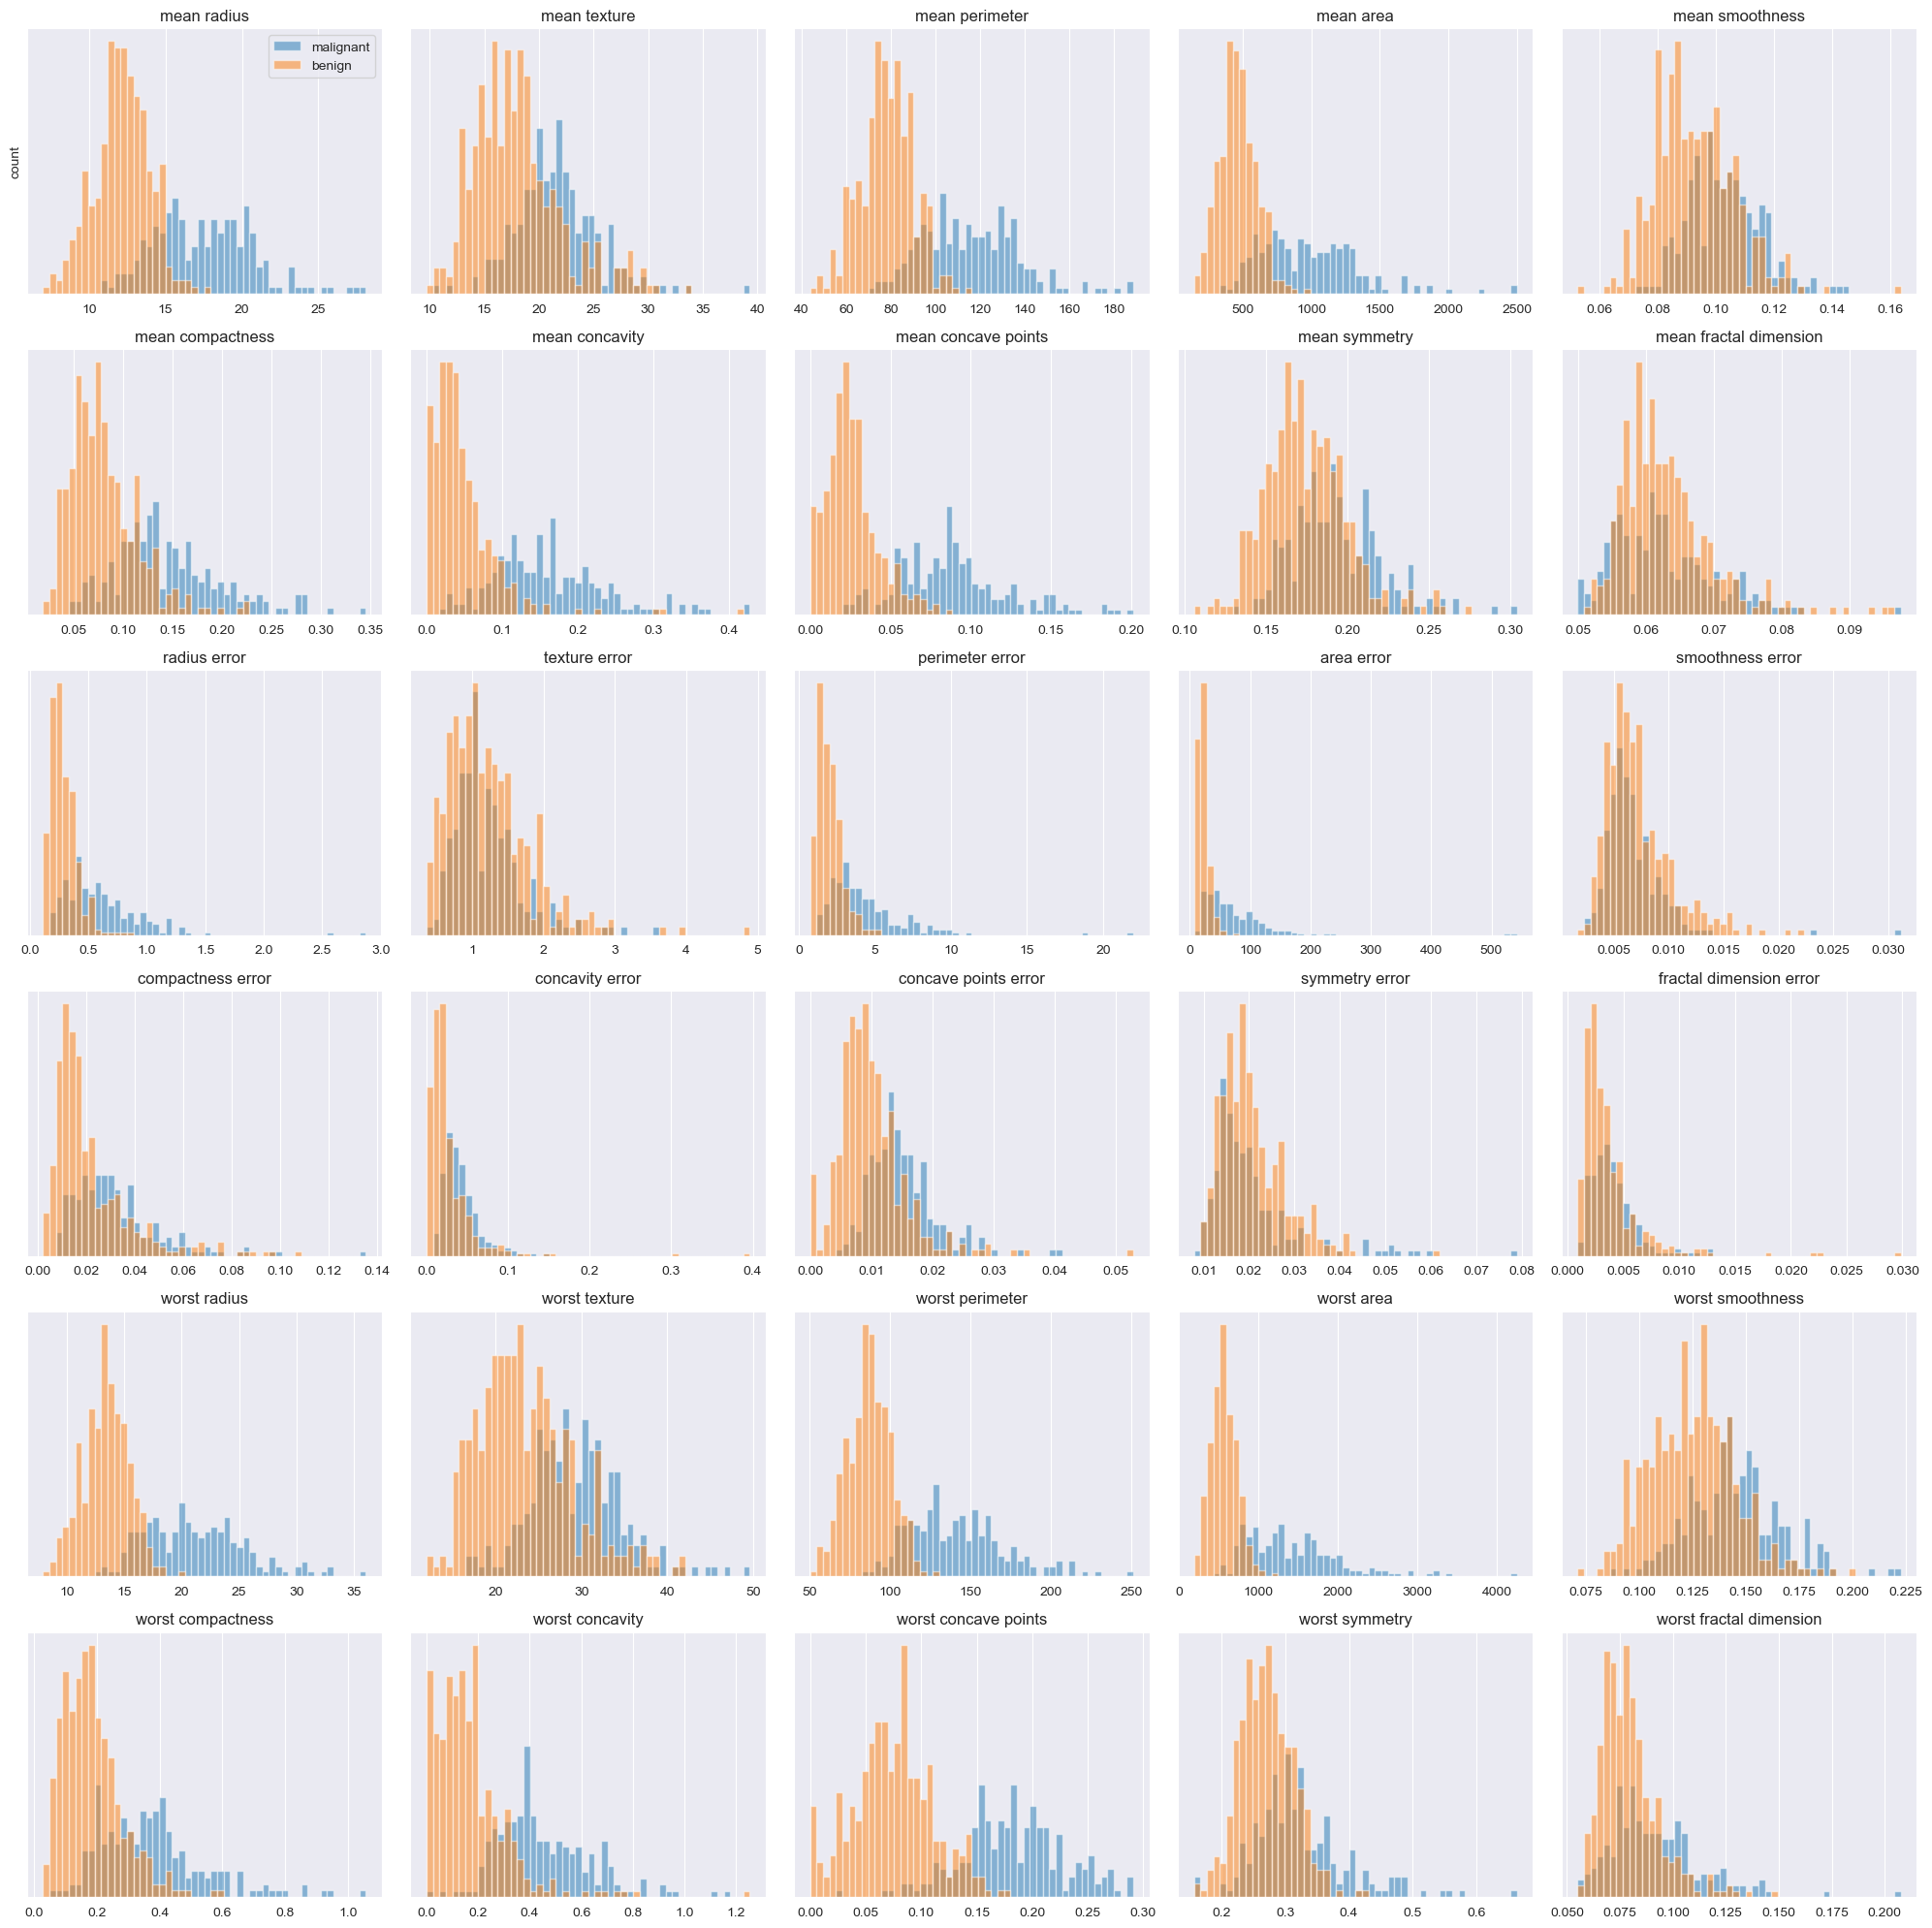

In [43]:
# 用來讀取乳癌資料之匯入
from sklearn.datasets import load_breast_cancer

# 取得乳癌資料
cancer = load_breast_cancer()

# 用來將資料分為malignant(惡性)與benign(良性)的過濾處理
# malignant(惡性)之cancer.target為0
malignant = cancer.data[cancer.target == 0]

# benign(良性)之cancer.target為1
benign = cancer.data[cancer.target == 1]

# malignant(惡性)、benign(良性)為橘色之直方圖
# 各圖為表示各個解釋變數(mean radius等)與目標變數的關係之直方圖
fig, axes = plt.subplots(6,5,figsize = (20,20))
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancar.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins, alpha = .5)
    ax[i].hist(benign[:,i], bins, alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

# 標籤的設定
ax[0].set_ylabel('count')
ax[0].legend(['malignant','benign'],loc = 'best')
fig.tight_layout()

In [38]:
# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

# 主成分分析
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

# 顯示
print('X_pca shape:{}'.format(X_pca.shape)) # 表示進行主成分分析之後的資料為569列2行(2變數)。之所以是成為2變數，是由於將主成分隻數量設定為2的緣故。
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(569, 2)
Explained variance ratio:[0.443 0.19 ]


In [41]:
# 對行附加標籤，第1個為第1主成分，第2個為第2主成分
X_pca = pd.DataFrame(X_pca, columns = ['pc1','pc2'])

# 對上述資料附加目標變數(cancer.target)，在橫向結合
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns = ['target'])], axis = 1)

# 分離惡性、良性
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

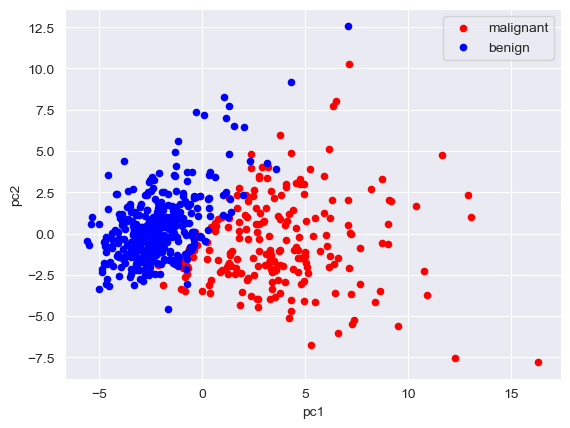

In [42]:
# 描繪惡性
ax = pca_malignant.plot.scatter(x = 'pc1', y = 'pc2', color = 'red', label = 'malignant')

# 描繪良性
pca_benign.plot.scatter(x = 'pc1', y = 'pc2', color = 'blue', label = 'benign', ax = ax)

#### 練習問題9-2

In [44]:
from sklearn.datasets import load_iris

iris = load_iris()

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(iris.data)

# 主成分分析
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('主成分分析前的資料維度:{}'.format(iris.data.shape))
print('主成分分析後的資料維度:{}'.format(X_pca.shape))

主成分分析前的資料維度:(150, 4)
主成分分析後的資料維度:(150, 2)


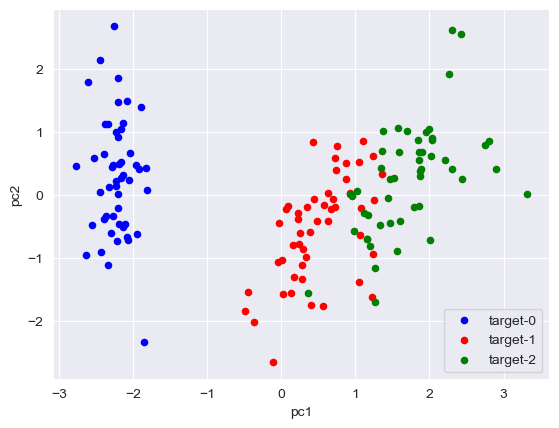

In [45]:
merge_data = pd.concat([pd.DataFrame(X_pca[:, 0]), pd.DataFrame(X_pca[:, 1]), pd.DataFrame(iris.target)], axis = 1)
merge_data.columns = ['pc1','pc2','target']

# 聚類分析結果的圖形化
ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('target'):
    ax = data.plot.scatter(
        x = 'pc1', y = 'pc2',
        color = colors[i], label = f'target-{i}', ax = ax
    )

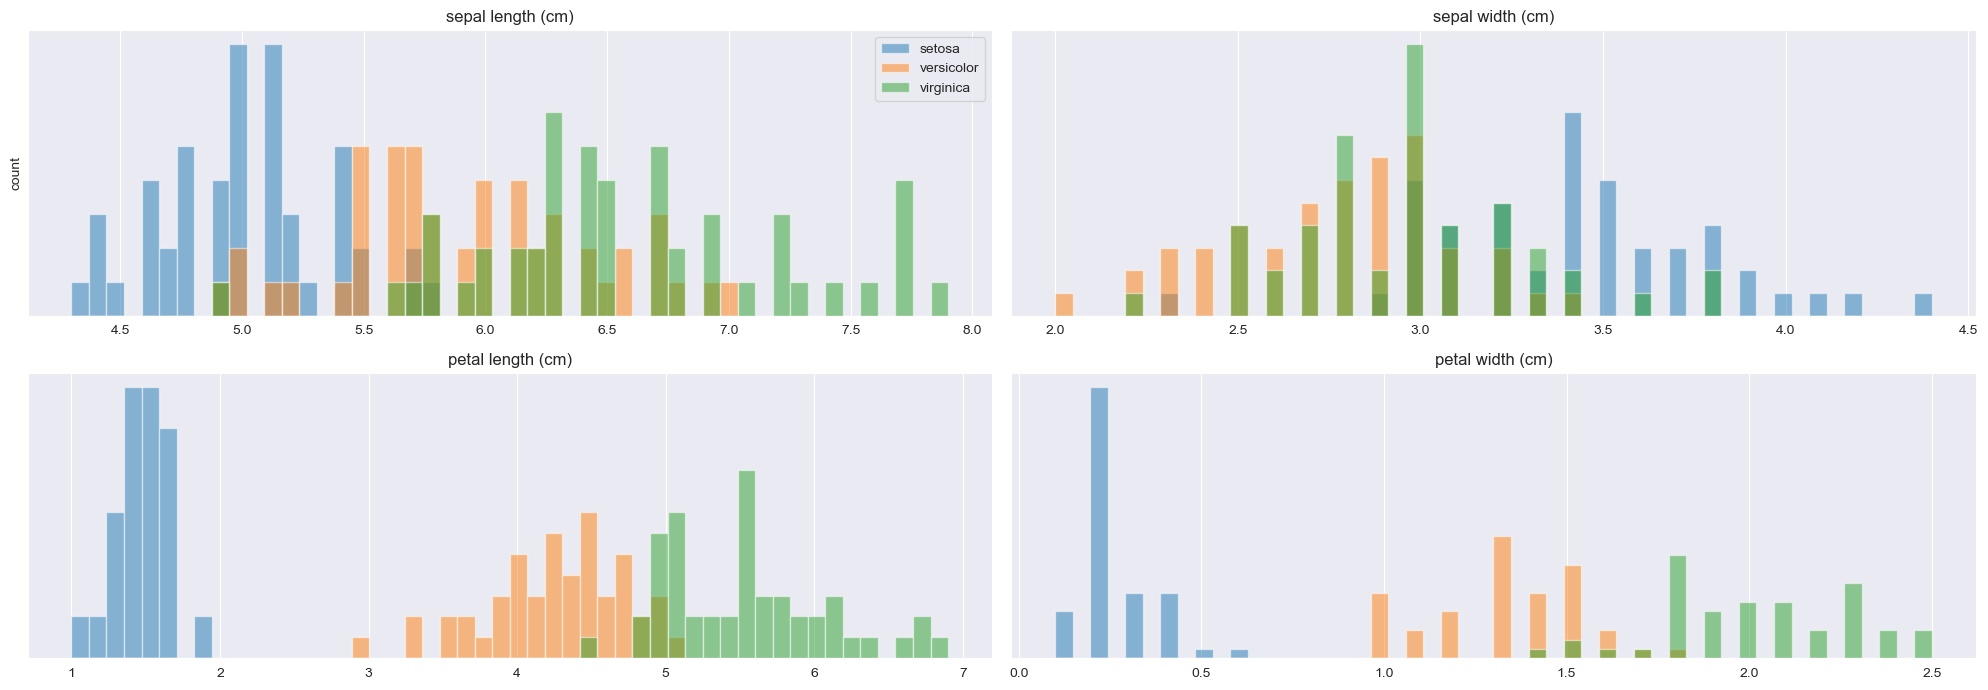

In [46]:
# 顯示目標變數與4個解釋變數各自的關係
fig, axes = plt.subplots(2,2,figsize = (20,7))

iris_0 = iris.data[iris.target == 0]
iris_1 = iris.data[iris.target == 1]
iris_2 = iris.data[iris.target == 2]

ax = axes.ravel()
for i in range(4):
    _, bins = np.histogram(iris.data[:,i], bins = 50)
    ax[i].hist(iris_0[:,i], bins, alpha = .5)
    ax[i].hist(iris_1[:,i], bins, alpha = .5)
    ax[i].hist(iris_2[:,i], bins, alpha = .5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())

# 標籤的設定
ax[0].set_ylabel('count')
ax[0].legend(['setosa','versicolor','virginica'],loc = 'best')
fig.tight_layout()